In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/bagjaeyeong/Library/Caches/pypoetry/virtualenvs/api-7V-RJ2NV-py3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/bagjaeyeong/Library/Caches/pypoetry/virtualenvs/api-7V-RJ2NV-py3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


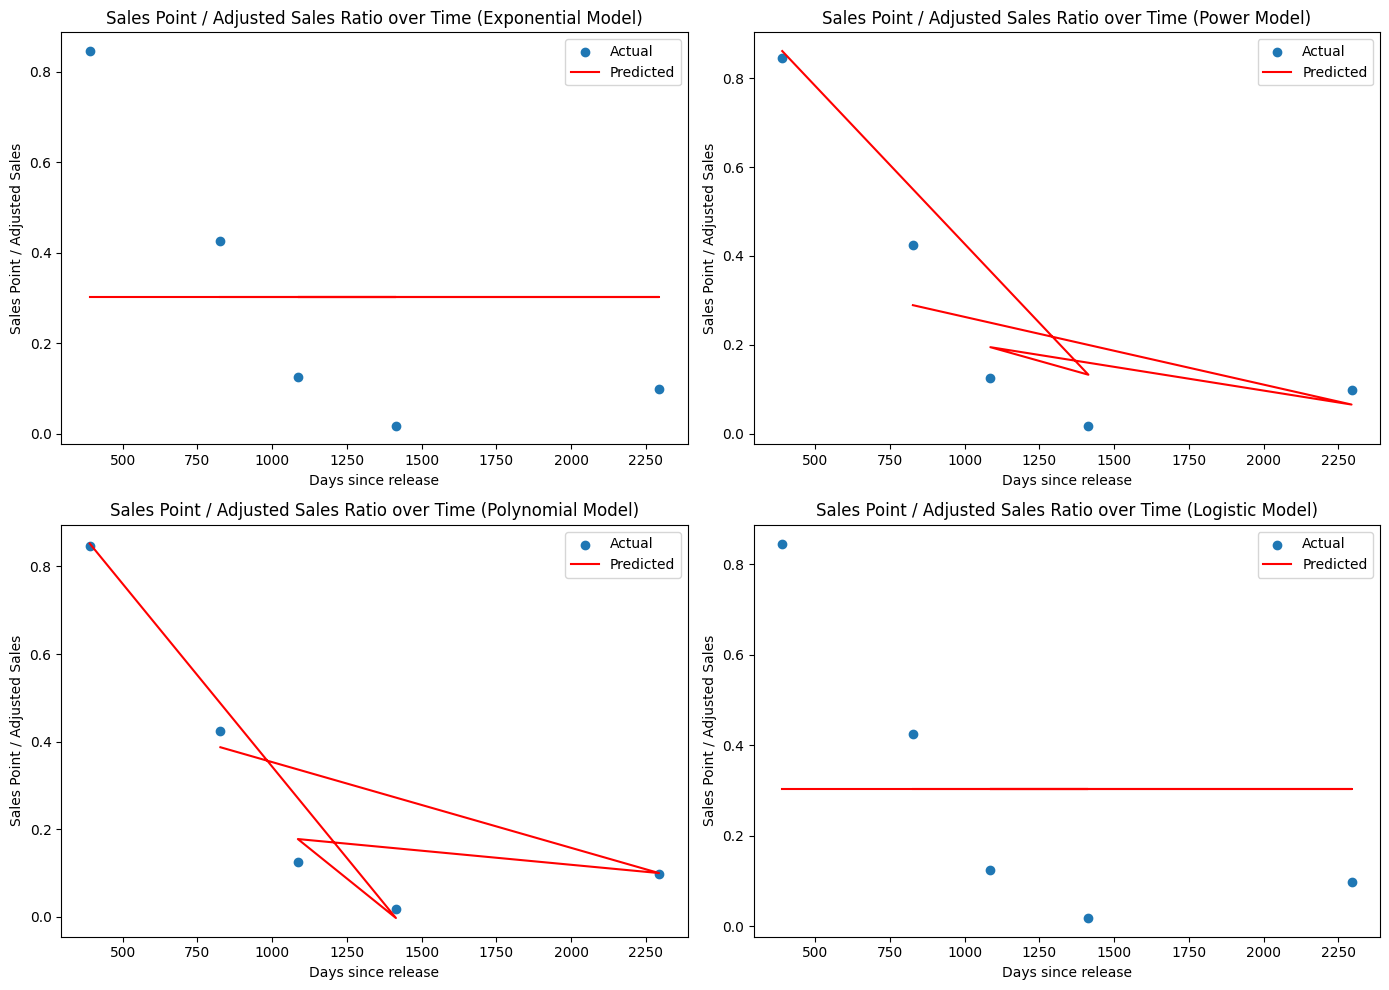

            book  sales_point  predicted_sales_point_Exponential  \
0    진짜 쓰는 실무 예제        71851                       5.115930e+04   
1  세계를 간다 너에게 갈게        62979                       1.933005e+05   
2      죽이고 싶은 아이        44863                       1.082483e+05   
3     달러구트 꿈 백화점        89418                       1.442276e+06   
4       도둑맞은 집중력       208312                       7.457582e+04   

   predicted_sales_point_Power  predicted_sales_point_Polynomial  \
0                 48883.772088                      65404.627870   
1                 42058.490217                      63778.517739   
2                 69671.137628                      63475.799924   
3                633060.477467                     -12674.711353   
4                211973.711057                     209856.471848   

   predicted_sales_point_Logistic  
0                    5.115930e+04  
1                    1.933005e+05  
2                    1.082483e+05  
3                    1.442276e+06  
4 

In [28]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 데이터 입력
data = {
    'book': ['진짜 쓰는 실무 예제', '세계를 간다 너에게 갈게', '죽이고 싶은 아이', '달러구트 꿈 백화점', '도둑맞은 집중력'],
    'release_date': ['2022-02-15', '2018-02-09', '2021-06-01', '2020-07-08', '2023-04-28'],
    'sales': [100000, 250000, 140000, 110000, 150000],
    'sales_point': [71851, 62979, 44863, 89418, 208312],
    'sales_observation_date': ['2023-12-09', '2023-08-01', '2023-08-01', '2021-02-21', '2023-12-18']
}

df = pd.DataFrame(data)

# 가정: 판매량이 관측일부터 2024년 5월 22일까지 월 10% 증가
df['days_since_sales_observation'] = (pd.to_datetime('2024-05-22') - pd.to_datetime(df['sales_observation_date'])).dt.days
df['adjusted_sales'] = df['sales'] * (1.1 ** (df['days_since_sales_observation'] / 30))

# 출간일부터 2024년 5월 22일까지의 기간 계산 (단위: 일)
df['days_since_release'] = (pd.to_datetime('2024-05-22') - pd.to_datetime(df['release_date'])).dt.days

# 모델 정의
def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

def power_func(x, a, b):
    return a * np.power(x, b)

def poly_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

def logistic_func(x, a, b, c):
    return c / (1 + a * np.exp(-b * x))

# 회귀분석 수행
models = [exp_func, power_func, poly_func, logistic_func]
model_names = ['Exponential', 'Power', 'Polynomial', 'Logistic']

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.ravel()

for i, (model, name) in enumerate(zip(models, model_names)):
    params, _ = curve_fit(model, df['days_since_release'], df['sales_point'] / df['adjusted_sales'])
    
    df[f'predicted_ratio_{name}'] = model(df['days_since_release'], *params)
    df[f'predicted_sales_point_{name}'] = df[f'predicted_ratio_{name}'] * df['adjusted_sales']
    
    axs[i].scatter(df['days_since_release'], df['sales_point'] / df['adjusted_sales'], label='Actual')
    axs[i].plot(df['days_since_release'], df[f'predicted_ratio_{name}'], color='red', label='Predicted')
    axs[i].set_xlabel('Days since release')
    axs[i].set_ylabel('Sales Point / Adjusted Sales')
    axs[i].legend()
    axs[i].set_title(f'Sales Point / Adjusted Sales Ratio over Time ({name} Model)')

plt.tight_layout()
plt.show()

print(df[['book', 'sales_point', 'predicted_sales_point_Exponential', 'predicted_sales_point_Power', 
          'predicted_sales_point_Polynomial', 'predicted_sales_point_Logistic']])

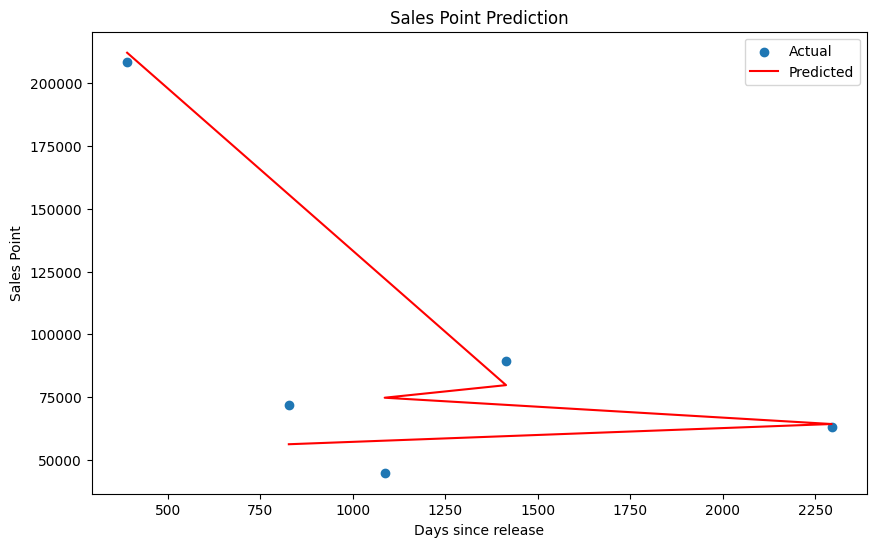

최적의 판매량 증가율 모델 매개변수:
a = -0.005750000000000165, b = 0.0009617187500000034


In [109]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from datetime import datetime

# 데이터 입력
data = {
    'book': ['진짜 쓰는 실무 예제', '세계를 간다 너에게 갈게', '죽이고 싶은 아이', '달러구트 꿈 백화점', '도둑맞은 집중력'],
    'release_date': ['2022-02-15', '2018-02-09', '2021-06-01', '2020-07-08', '2023-04-28'],
    'sales': [100000, 250000, 140000, 110000, 150000],
    'sales_point': [71851, 62979, 44863, 89418, 208312],
    'sales_observation_date': ['2023-12-09', '2023-08-01', '2023-08-01', '2021-02-21', '2023-12-18']
}

df = pd.DataFrame(data)

# 출간일부터 2024년 5월 22일까지의 기간 계산 (단위: 일)
df['days_since_release'] = (pd.to_datetime('2024-05-22') - pd.to_datetime(df['release_date'])).dt.days

# 다항 함수 모델 정의
def poly_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# 다항 함수 모델 피팅
params, _ = curve_fit(poly_func, df['days_since_release'], df['sales_point'] / df['sales'])

# 지수 함수를 사용하여 판매량 증가율 모델링
def sales_growth_rate(days, a, b):
    return max(a * np.exp(-b * days), 0)

# 세일즈포인트 예측 함수
def predict_sales_point(sales, release_date, max_growth_rate, growth_rate_params):
    days_since_release = (datetime.now() - datetime.strptime(release_date, '%Y-%m-%d')).days
    growth_rate = min(sales_growth_rate(days_since_release, *growth_rate_params), max_growth_rate)
    adjusted_sales = sales * (1 + growth_rate) ** (days_since_release / 30)
    predicted_ratio = poly_func(days_since_release, *params)
    predicted_sales_point = predicted_ratio * adjusted_sales
    return predicted_sales_point

# 최적의 판매량 증가율 모델 매개변수 찾기
def objective_function(params):
    a, b = params
    errors = []
    for _, row in df.iterrows():
        predicted_sales_point = predict_sales_point(row['sales'], row['release_date'], 0.02, [a, b])
        error = (predicted_sales_point - row['sales_point']) ** 2
        errors.append(error)
    return np.mean(errors)

from scipy.optimize import minimize

initial_guess = [0.04, 0.0005]
result = minimize(objective_function, initial_guess, method='Nelder-Mead')
best_params = result.x

# 예측 모델 적용
df['predicted_sales_point'] = df.apply(lambda row: predict_sales_point(row['sales'], row['release_date'], 0.02, best_params), axis=1)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.scatter(df['days_since_release'], df['sales_point'], label='Actual')
plt.plot(df['days_since_release'], df['predicted_sales_point'], color='red', label='Predicted')
plt.xlabel('Days since release')
plt.ylabel('Sales Point')
plt.legend()
plt.title('Sales Point Prediction')
plt.show()

print("최적의 판매량 증가율 모델 매개변수:")
print(f"a = {best_params[0]}, b = {best_params[1]}")

In [110]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit, minimize
from datetime import datetime

def poly_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

def sales_growth_rate(days, a, b):
    return max(a * np.exp(-b * days), 0)

def predict_sales_point(sales, release_date, max_growth_rate, growth_rate_params, poly_params):
    days_since_release = (datetime.now() - datetime.strptime(release_date, '%Y-%m-%d')).days
    growth_rate = min(sales_growth_rate(days_since_release, *growth_rate_params), max_growth_rate)
    adjusted_sales = sales * (1 + growth_rate) ** (days_since_release / 30)
    predicted_ratio = poly_func(days_since_release, *poly_params)
    predicted_sales_point = predicted_ratio * adjusted_sales
    return predicted_sales_point

def objective_function(params, data, poly_params):
    a, b, max_growth_rate = params
    errors = []
    for _, row in data.iterrows():
        predicted_sales_point = predict_sales_point(row['sales'], row['release_date'], max_growth_rate, [a, b], poly_params)
        error = (predicted_sales_point - row['sales_point']) ** 2
        errors.append(error)
    return np.mean(errors)

def train_model(data):
    data['days_since_release'] = (pd.to_datetime('2024-05-22') - pd.to_datetime(data['release_date'])).dt.days
    poly_params, _ = curve_fit(poly_func, data['days_since_release'], data['sales_point'] / data['sales'])

    initial_guess = [0.04, 0.0005, 0.02]
    bounds = [(0, None), (0, None), (0, None)]
    result = minimize(objective_function, initial_guess, args=(data, poly_params), method='Nelder-Mead', bounds=bounds)
    best_params = result.x

    return poly_params, best_params

def predict_sales_points(data, poly_params, growth_rate_params, max_growth_rate):
    data['predicted_sales_point'] = data.apply(lambda row: predict_sales_point(row['sales'], row['release_date'], max_growth_rate, growth_rate_params, poly_params), axis=1)
    return data

# 사용 예시
data = {
    'book': ['진짜 쓰는 실무 예제', '세계를 간다 너에게 갈게', '죽이고 싶은 아이', '달러구트 꿈 백화점', '도둑맞은 집중력'],
    'release_date': ['2022-02-15', '2018-02-09', '2021-06-01', '2020-07-08', '2023-04-28'],
    'sales': [100000, 250000, 140000, 110000, 150000],
    'sales_point': [71851, 62979, 44863, 89418, 208312],
    'sales_observation_date': ['2023-12-09', '2023-08-01', '2023-08-01', '2021-02-21', '2023-12-18']
}

df = pd.DataFrame(data)

poly_params, best_params = train_model(df)
growth_rate_params = best_params[:2]
max_growth_rate = best_params[2]

df = predict_sales_points(df, poly_params, growth_rate_params, max_growth_rate)

print(f"최적의 판매량 증가율 모델 매개변수: a = {growth_rate_params[0]}, b = {growth_rate_params[1]}")
print(f"최적의 최대 증가율: {max_growth_rate}")
print(df[['book', 'sales_point', 'predicted_sales_point']])

최적의 판매량 증가율 모델 매개변수: a = 0.0, b = 0.000866666666666669
최적의 최대 증가율: 0.01733333333333331
            book  sales_point  predicted_sales_point
0    진짜 쓰는 실무 예제        71851           56211.554907
1  세계를 간다 너에게 갈게        62979           64262.405401
2      죽이고 싶은 아이        44863           74740.822816
3     달러구트 꿈 백화점        89418           79753.736847
4       도둑맞은 집중력       208312          212167.712045


In [168]:
def predict_sales_point(sales, release_date):
    a = -0.005
    b = 0.001
    
    def sales_growth_rate(days, a, b):
        return max(a * np.exp(-b * days), -0.0005)
    
    days_since_release = (datetime.now() - datetime.strptime(release_date, '%Y-%m-%d')).days
    growth_rate = sales_growth_rate(days_since_release, a, b)
    adjusted_sales = sales * (1 + growth_rate) ** (days_since_release / 30)
    predicted_ratio = poly_func(days_since_release, *params)
    predicted_sales_point = predicted_ratio * adjusted_sales
    return predicted_sales_point

In [169]:
print(predict_sales_point(100000, '2022-02-15'))
print(predict_sales_point(250000, '2018-02-09'))
print(predict_sales_point(140000, '2021-06-01'))
print(predict_sales_point(110000, '2020-07-08'))
print(predict_sales_point(150000, '2023-04-28'))

55441.89629641943
61851.22412369098
73399.85106558565
77895.7221927503
210792.7516110833


In [171]:
def predict_sales_from_sales_point(sales_point, release_date):
    a = -0.005
    b = 0.001
    
    def sales_growth_rate(days, a, b):
        return max(a * np.exp(-b * days), -0.0005)
    
    days_since_release = (datetime.now() - datetime.strptime(release_date, '%Y-%m-%d')).days
    growth_rate = sales_growth_rate(days_since_release, a, b)
    
    def poly_func_inverse(sales_point, days_since_release, a, b, c, d):
        predicted_ratio = poly_func(days_since_release, a, b, c, d)
        adjusted_sales = sales_point / predicted_ratio
        sales = adjusted_sales / ((1 + growth_rate) ** (days_since_release / 30))
        return sales
    
    sales = poly_func_inverse(sales_point, days_since_release, *params)
    return sales

In [173]:
predict_sales_from_sales_point(500, '2024-01-01')

194.46010044575831